Создаем графики и отображаем их

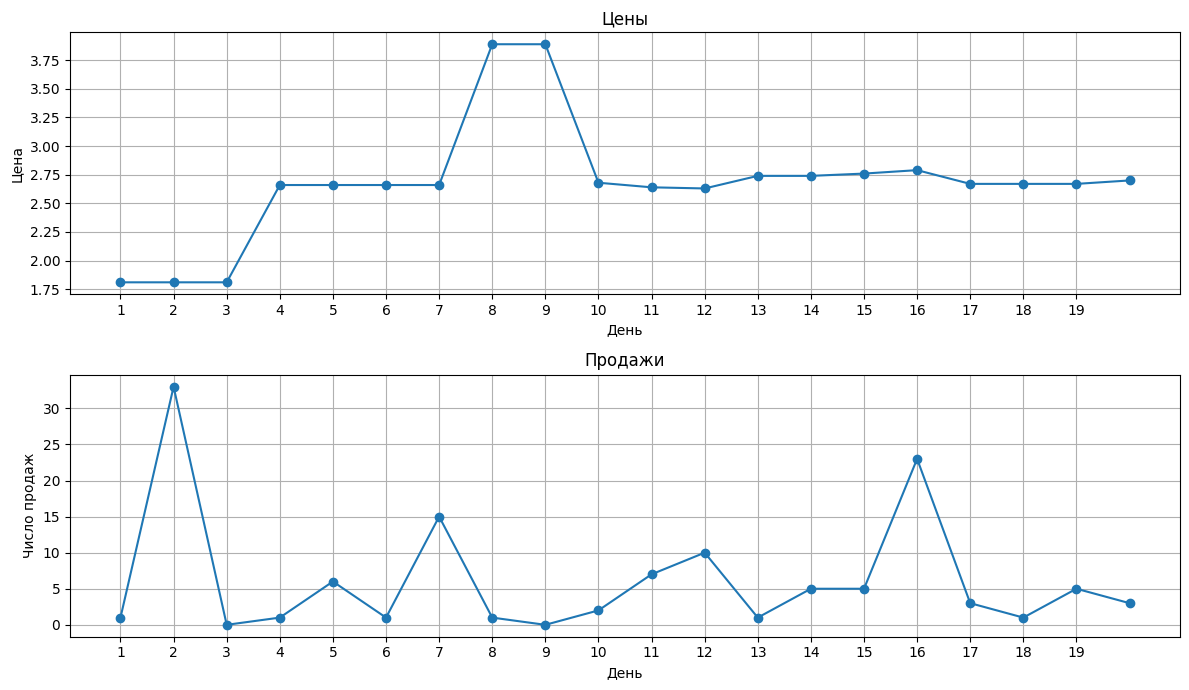

In [314]:
import csv
from math import sqrt, log, log10, floor, ceil
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example: Line Chart
with open("DataSet.csv", newline='\n') as fp:
    reader = csv.reader(fp, delimiter=';', )
    data = [row for row in reader]
    title = data[0]
    data = data[1:]

dates = [i for i in range(1, 21)]
prices = [float(row[1].replace(',', '.')) for row in data]
sales = [int(row[2]) for row in data]

fig, ax = plt.subplots(2, 1, figsize=(12, 7))

price_plot = ax[0]
price_plot.plot(dates, prices, marker='o', label='Цена')

price_plot.set_xlabel(title[0])
price_plot.set_ylabel(title[1])
price_plot.set_title('Цены')
price_plot.set_xticks(np.arange(min(dates), max(dates), 1))

price_plot.locator_params('y', nbins=len(set(prices)))

ax[0] = price_plot
price_plot.grid()

sales_plot = ax[1]
sales_plot.plot(dates, sales, marker='o', label='Продажи')

sales_plot.set_xlabel(title[0])
sales_plot.set_ylabel(title[2])
sales_plot.set_title('Продажи')
sales_plot.set_xticks(np.arange(min(dates), max(dates), 1))

ax[1] = sales_plot
sales_plot.grid()
fig.tight_layout()
plt.show()

Определим и нанесем на график среднее значение (математическое ожидание (М(Х)), значение медианы (Ме) и моды (Мо).

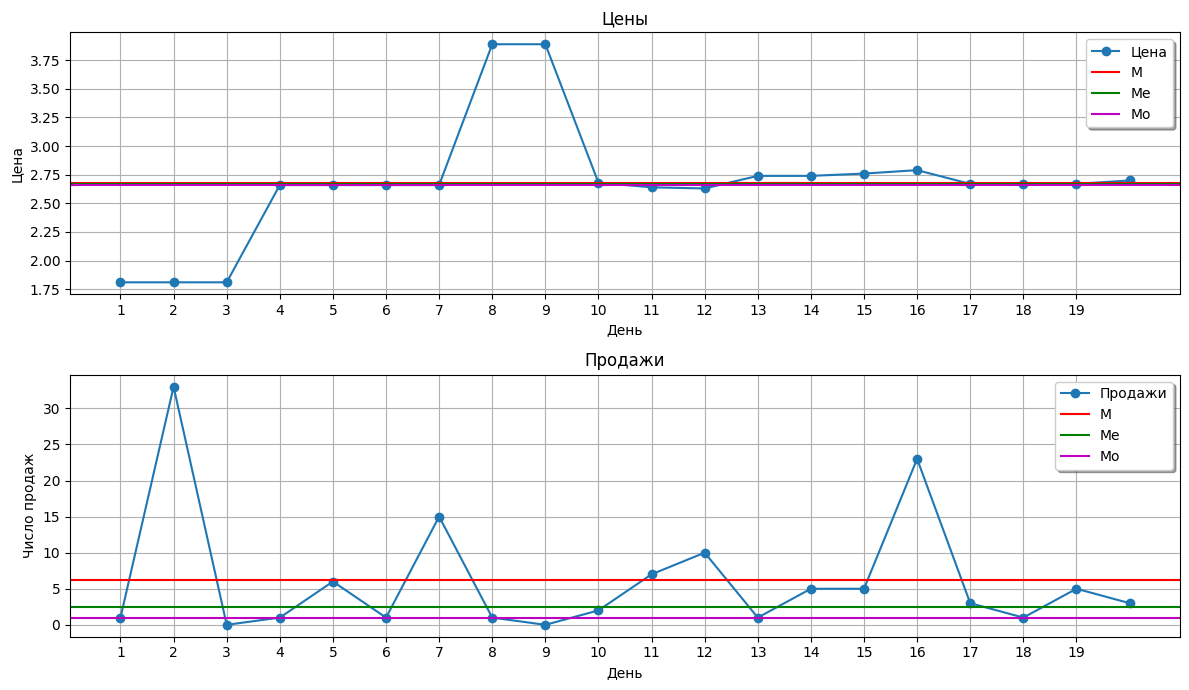

In [315]:
n = len(prices)
prices_sorted = sorted(prices)
sales_sorted = sorted(sales)
M_price = sum(prices) / len(prices)
M_sales = sum(sales) / len(sales)

Me_price = (prices_sorted[n // 2 - 2] + prices_sorted[n // 2 - 1]) / 2
Me_sales = (sales_sorted[n // 2 - 2] + sales_sorted[n // 2 - 1]) / 2

Mo_price = max(prices, key=prices.count)
Mo_sales = max(sales, key=sales.count)
# Отображаем выведенные значения на графике
price_plot.axhline(y=M_price, color='r', label='M')
price_plot.axhline(y=Me_price, color='g', label='Me')
price_plot.axhline(y=Mo_price, color='m', label='Mo')

sales_plot.axhline(y=M_sales, color='r', label='M')
sales_plot.axhline(y=Me_sales, color='g', label='Me')
sales_plot.axhline(y=Mo_sales, color='m', label='Mo')

price_plot.legend(fontsize=10, shadow=True)
sales_plot.legend(fontsize=10, shadow=True)
fig.tight_layout()
fig

Считаем среднее геометрическое, гармоническое значение, дисперсию и среднеквадратичное отклонение для цен и продаж

In [316]:
avg_geom_price = 1
for price in prices:
    avg_geom_price *= price
avg_geom_price = avg_geom_price ** (1 / n)

avg_geom_sale = 1
for sale in sales:
    avg_geom_sale *= sale
avg_geom_sale = avg_geom_sale ** (1 / n)

# Гармоничные значения
try:
    har_sum = 0
    for price in prices:
        har_sum += 1 / price
    har_price = n / har_sum
except:
    har_price = None

try:
    har_sum = 0
    for sale in sales:
        har_sum += 1 / sale
    har_sale = n / har_sum
except:
    har_sale = None

# Дисперсия
D_sum = 0
for price in prices:
    D_sum += (M_price - price) ** 2
D_price = D_sum / n

D_sum = 0
for sale in sales:
    D_sum += (M_sales - sale) ** 2
D_sale = D_sum / n

# Среднеквадратичное отклонение
SD_price = sqrt(D_price)
SD_sale = sqrt(D_sale)
print('Цена:')
print(f'Среднее геометрическое: {avg_geom_price}\n'
      f'Гармоническое значение: {har_price}\n'
      f'Дисперсия: {D_price}\n'
      f'Среднее квадратичное отклонение: {SD_price}\n')

print('Продажи:')
print(f'Среднее геометрическое: {avg_geom_sale}\n'
      f'Гармоническое значение: {har_sale}\n'
      f'Дисперсия: {D_sale}\n'
      f'Среднее квадратичное отклонение: {SD_sale}\n')

Цена:
Среднее геометрическое: 2.628774874145723
Гармоническое значение: 2.5799321724081032
Дисперсия: 0.26154099999999997
Среднее квадратичное отклонение: 0.5114107937851918

Продажи:
Среднее геометрическое: 0.0
Гармоническое значение: None
Дисперсия: 68.7275
Среднее квадратичное отклонение: 8.290205063808736


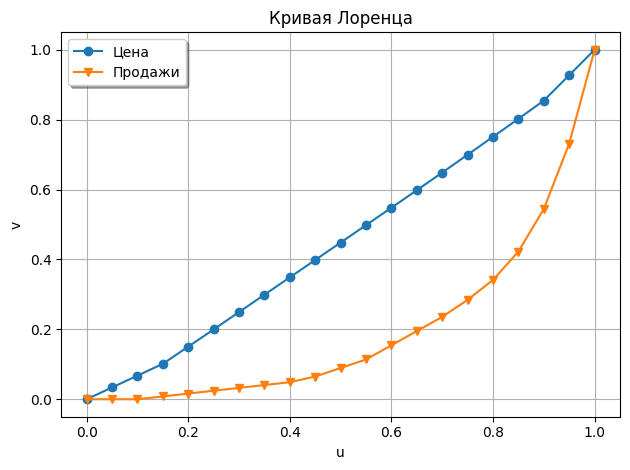

In [317]:
# Строим кривую Лоренца
u = [0]
v_price = [0]
v_sale = [0]

for j in range(1, 21):
    u.append(j / n)
    v_price.append(sum(sorted(prices)[:j]) / sum(prices))
    v_sale.append((sum(sorted(sales)[:j])) / sum(sales))

plt.plot(u, v_price, marker='o', label='Цена')
plt.plot(u, v_sale, marker='v', label='Продажи')

plt.xlabel('u')
plt.ylabel('v')
plt.title('Кривая Лоренца')
plt.grid()

plt.legend(fontsize=10, shadow=True)
plt.tight_layout()
plt.show()

Считаем значение коэффициента Джинни и индекса Херфиндаля

In [318]:
G_price = ((2 * sum([(i + 1) * prices_sorted[i] for i in range(n)])) / (
        n * sum(prices))) - ((n + 1) / n)
H_price = sum([(price / sum(prices)) ** 2 for price in prices])

G_sale = ((2 * sum([dates[i] * sales_sorted[i] for i in range(n)])) / (
        n * sum(sales))) - ((n + 1) / n)
H_sale = sum([(sale / sum(sales)) ** 2 for sale in sales])

print('Цена:')
print(f'Коэффициент Джинни: {G_price}\n'
      f'Индекс Херфиндаля: {H_price}\n')

print('Продажи:')
print(f'Коэффициент Джинни: {G_sale}\n'
      f'Индекс Херфиндаля: {H_sale}\n')

Цена:
Коэффициент Джинни: 0.0873178931639893
Индекс Херфиндаля: 0.051824790628507277

Продажи:
Коэффициент Джинни: 0.615040650406504
Индекс Херфиндаля: 0.14085531099213433


Строим вариационный ряд, 

# Вторая лабораторная

Строим вариационный ряд, частотную таблицу и интервальный ряд

In [319]:
df = pd.DataFrame({' ': dates, 'Цены': prices_sorted, 'Продажи': sales_sorted})
#print(df.to_string(index=False))
print('\nЧастотная таблица для цен:')
frequency_prices = pd.crosstab(index=df['Цены'], columns='Повторения')

frequency_prices['Частота'] = frequency_prices / len(dates)
print(frequency_prices)

print('\nЧастотная таблица для продаж:')
frequency_sales = pd.crosstab(index=df['Продажи'], columns='Повторения')

frequency_sales['Частота'] = frequency_sales / len(dates)
print(frequency_sales)


Частотная таблица для цен:
col_0  Повторения  Частота
Цены                      
1.81            3     0.15
2.63            1     0.05
2.64            1     0.05
2.66            4     0.20
2.67            3     0.15
2.68            1     0.05
2.70            1     0.05
2.74            2     0.10
2.76            1     0.05
2.79            1     0.05
3.89            2     0.10

Частотная таблица для продаж:
col_0    Повторения  Частота
Продажи                     
0                 2     0.10
1                 6     0.30
2                 1     0.05
3                 2     0.10
5                 3     0.15
6                 1     0.05
7                 1     0.05
10                1     0.05
15                1     0.05
23                1     0.05
33                1     0.05


Строим интервальный ряд

In [320]:
# Количество интервалов
k = 1 + floor(3.32 * log10(len(prices)))
# Ширина интервала
h_price = round((max(prices) - min(prices)) / k, 6)
h_sales = round((max(sales) - min(sales)) / k, 6)
print(h_price)
print(h_sales)
# Создаем интервальный ряд
# Создаем интервальный ряд
intervals_price = pd.interval_range(start=df['Цены'].min(),
                                    end=df['Цены'].max(),
                                    freq=h_price + 0.00000000000001,
                                    closed='left')

intervals_sales = pd.interval_range(start=df['Продажи'].min(),
                                    end=df['Продажи'].max(),
                                    freq=h_sales + 0.00000000000001,
                                    closed='left')


def round_intervals(inter: pd.Interval):
    if round(inter.right, 6) == max(df['Цены']) or round(inter.right, 6) == max(
            df['Продажи']):
        return pd.Interval(round(inter.left, 6), round(inter.right, 6), 'both')
    return pd.Interval(round(inter.left, 6), round(inter.right, 6),
                       inter.closed)


# Группируем данные по интервалам
df['Цены_интервал'] = pd.cut(df['Цены'], bins=intervals_price, right=True)
df['Цены_интервал'] = df['Цены_интервал'].apply(lambda x: round_intervals(x))
frequency_prices_interval = df.groupby('Цены_интервал', observed=False).size()

# Вычисляем относительную частоту
frequency_prices_normalized = frequency_prices_interval / n

# Аналогично для продаж
df['Продажи_интервал'] = pd.cut(df['Продажи'], bins=intervals_sales, right=True)
df['Продажи_интервал'] = df['Продажи_интервал'].apply(
    lambda x: round_intervals(x))
frequency_sales_interval = df.groupby('Продажи_интервал', observed=False).size()
frequency_sales_normalized = frequency_sales_interval / n

# Выводим результаты
print("Интервальный ряд для цен:")
print(frequency_prices_normalized)

print("\nИнтервальный ряд для продаж:")
print(frequency_sales_normalized)
print(type(frequency_sales_normalized))


0.416
6.6
Интервальный ряд для цен:
Цены_интервал
[1.81, 2.226)     0.15
[2.226, 2.642)    0.10
[2.642, 3.058)    0.65
[3.058, 3.474)    0.00
[3.474, 3.89]     0.10
dtype: float64

Интервальный ряд для продаж:
Продажи_интервал
[0.0, 6.6)      0.75
[6.6, 13.2)     0.10
[13.2, 19.8)    0.05
[19.8, 26.4)    0.05
[26.4, 33.0]    0.05
dtype: float64
<class 'pandas.core.series.Series'>


# Строим Полигоны частот

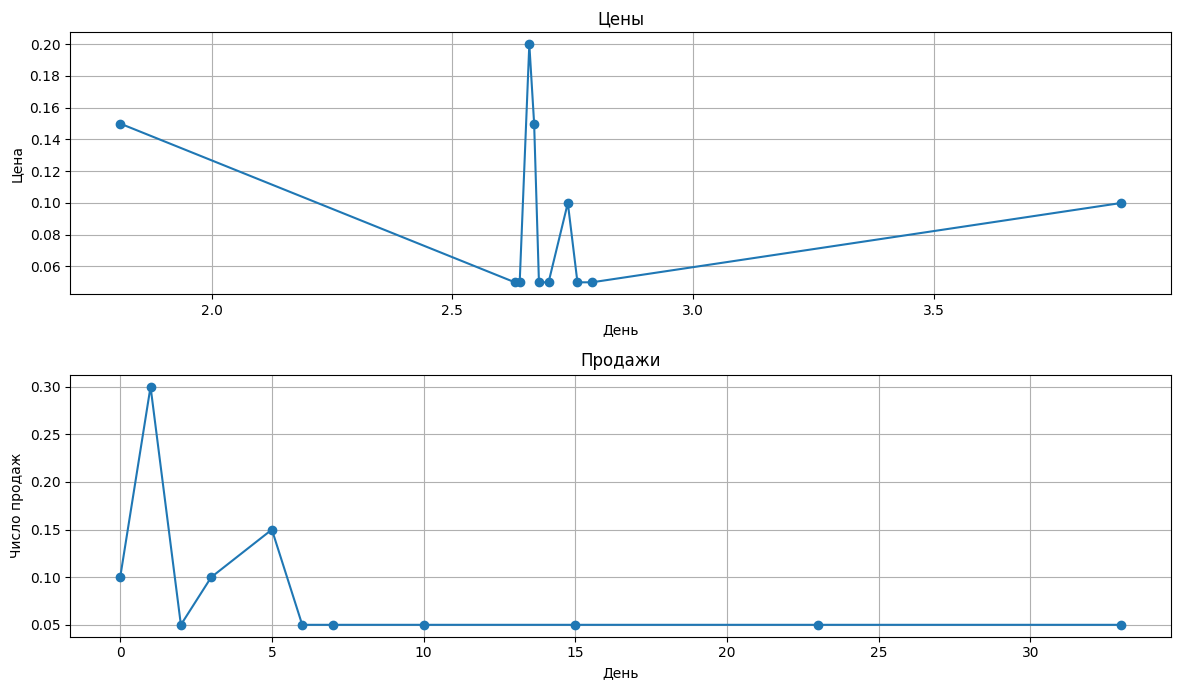

In [321]:

fig, ax = plt.subplots(2, 1, figsize=(12, 7))
price_plot = ax[0]
price_plot.plot(sorted(list(set(prices))), frequency_prices['Частота'],
                marker='o', label='Полигон частот для цены')

price_plot.set_xlabel(title[0])
price_plot.set_ylabel(title[1])
price_plot.set_title('Цены')

ax[0] = price_plot
price_plot.grid()

sales_plot = ax[1]
sales_plot.plot(sorted(list(set(sales))), frequency_sales['Частота'],
                marker='o', label='Полигон частот для продаж')

sales_plot.set_xlabel(title[0])
sales_plot.set_ylabel(title[2])
sales_plot.set_title('Продажи')

ax[1] = sales_plot
sales_plot.grid()
fig.tight_layout()
plt.show()

# Строим гистограмму интервального ряда

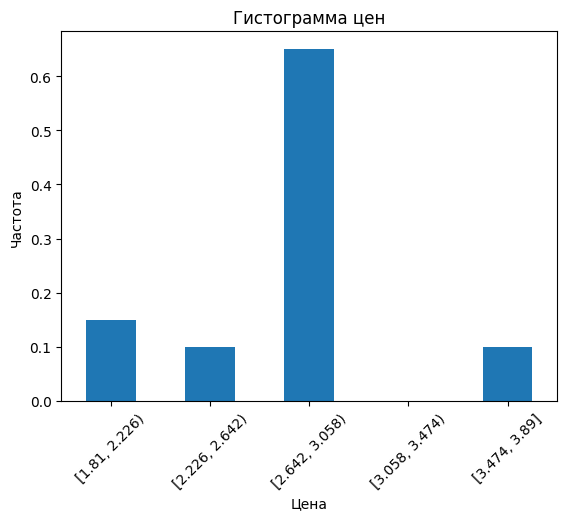

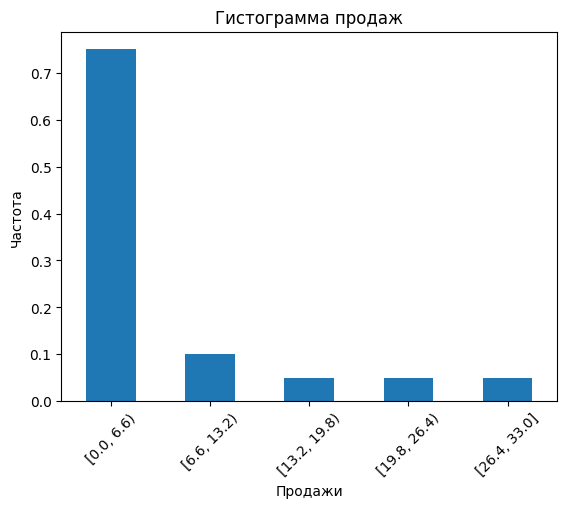

In [322]:
frequency_prices_normalized.sort_index().plot(kind='bar')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.title('Гистограмма цен')
plt.xticks(rotation=45)  # 
plt.show()

# Создаем гистограмму для продаж
frequency_sales_normalized.sort_index().plot(kind='bar')
plt.xlabel('Продажи')
plt.ylabel('Частота')
plt.title('Гистограмма продаж')
plt.xticks(rotation=45)  # 
plt.show()

0.0 x<-inf
0.15 x<1.81
0.2 x<2.63
0.25 x<2.64
0.45 x<2.66
0.6 x<2.67
0.65 x<2.68
0.7 x<2.7
0.8 x<2.74
0.85 x<2.76
0.9 x<2.79
1.0 x<3.89


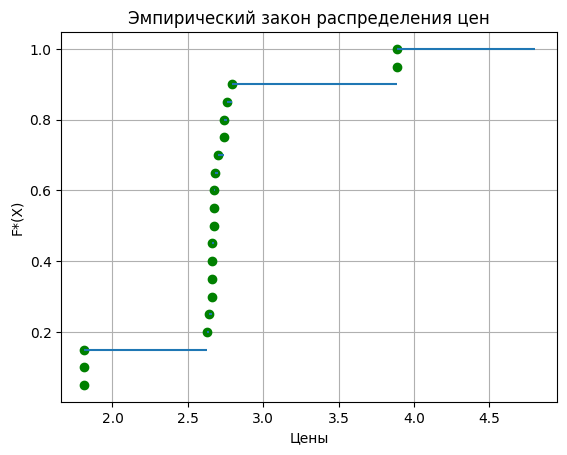

0.0 x<-inf
0.1 x<0.0
0.4 x<1.0
0.45 x<2.0
0.55 x<3.0
0.7 x<5.0
0.75 x<6.0
0.8 x<7.0
0.85 x<10.0
0.9 x<15.0
0.95 x<23.0
1.0 x<33.0


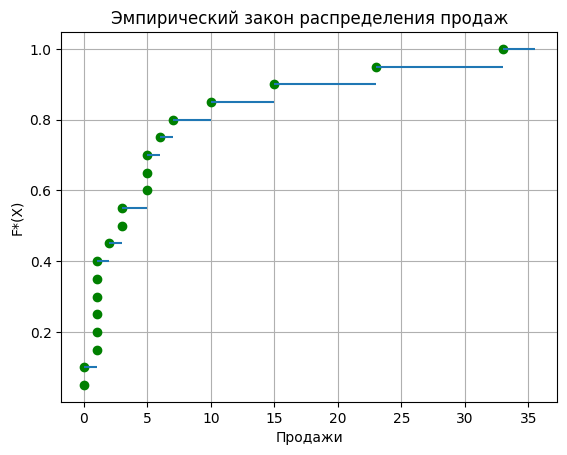

In [323]:
ecdf_prices = ECDF(df['Цены'])
ecdf_dict_prices = {}
for x, y in zip(ecdf_prices.x, ecdf_prices.y):
    ecdf_dict_prices[f'x<{x}'] = round(y, 6)
    plt.plot(x, y, 'go')
for k, v in ecdf_dict_prices.items():
    print(v, k)
xmax = [i for i in ecdf_prices.x] + [4.8]

plt.hlines(y=sorted(set(ecdf_prices.y)), xmin=ecdf_prices.x, xmax=xmax[1:])
plt.grid()
plt.xlabel('Цены')
plt.ylabel('F*(X)')
plt.title('Эмпирический закон распределения цен')
plt.show()

ecdf_sales = ECDF(df['Продажи'])
ecdf_dict_sales = {}
for x, y in zip(ecdf_sales.x, ecdf_sales.y):
    ecdf_dict_sales[f'x<{x}'] = round(y, 6)
    plt.plot(x, y, 'go')
for k, v in ecdf_dict_sales.items():
    print(v, k)
xmax = [i for i in ecdf_sales.x] + [max(sales) + Me_sales]

plt.hlines(y=sorted(set(ecdf_sales.y)), xmin=ecdf_sales.x, xmax=xmax[1:])
plt.grid()
plt.xlabel('Продажи')
plt.ylabel('F*(X)')
plt.title('Эмпирический закон распределения продаж')
plt.show()

## Энтропия временного ряда

In [324]:
def calc_entropy(column):
    result = 0
    for i in column:
        if i == 0:
            return None
        result -= i * log(i)
    return result


print('Энтропия по частотным таблицам')
print('Для цен: ', calc_entropy(frequency_prices['Частота']))
print('Для продаж: ', calc_entropy(frequency_sales['Частота']))

print('\nЭнтропия по интервалам (для гистограммы)')
print('Для цен: ', calc_entropy(frequency_prices_normalized))
print('Для продаж: ', calc_entropy(frequency_sales_normalized))

print('\nЭнтропия по теоретическим законам распределения')
print('Для цен: ', calc_entropy(list(ecdf_dict_prices.values())[1:]))
print('Для продаж: ', calc_entropy(list(ecdf_dict_sales.values())[1:]))

Энтропия по частотным таблицам
Для цен:  2.2502602786175907
Для продаж:  2.154783153373369

Энтропия по интервалам (для гистограммы)
Для цен:  None
Для продаж:  0.8953799046713388

Энтропия по теоретическим законам распределения
Для цен:  2.5600147594909943
Для продаж:  2.2105566557432965


## Box-plot диаграмма

              Q5   Q25   Q50   Q75    Q95  IQR  Q25-1.5*IQR  Q75+1.5*IQR  \
0     Цена  1.81  2.64  2.67  2.74   3.89  0.1         2.49         2.89   
1  Продажи  0.00  1.00  3.00  6.00  23.00  5.0        -6.50        13.50   

    Min    Max  
0  2.63   2.79  
1  0.00  10.00  


[]

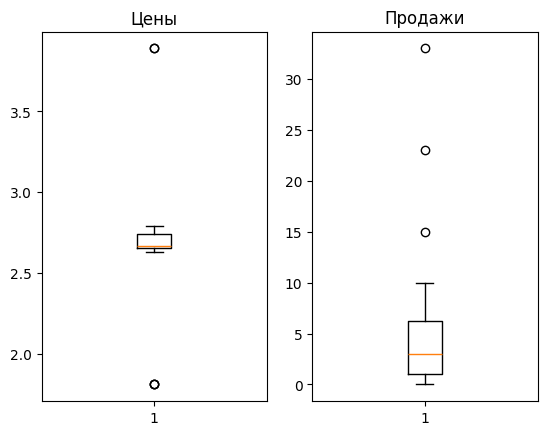

In [325]:
boxplot_data = pd.DataFrame()
boxplot_data[' '] = ['Цена', 'Продажи']
for i in [5, 25, 50, 75, 95]:
    index1, index2 = ceil(n * i / 100)-1, floor(n * i / 100)-1
    if index1 == index2:
        boxplot_data[f'Q{i}'] = [prices_sorted[index1],
                                 sales_sorted[index1]]
    else:
        res = []
        for part in [prices_sorted, sales_sorted]:
            res.append(round((part[index1] + part[index2])/2, 6))
        boxplot_data[f'Q{i}'] = res
boxplot_data['IQR'] = boxplot_data['Q75'] - boxplot_data['Q25']
boxplot_data['Q25-1.5*IQR'] = boxplot_data['Q25'] - 1.5*boxplot_data['IQR']
boxplot_data['Q75+1.5*IQR'] = boxplot_data['Q75'] + 1.5*boxplot_data['IQR']
boxplot_data['Min'] = [min([i for i in prices if i > boxplot_data['Q25-1.5*IQR'][0]]), min([i for i in sales if i > boxplot_data['Q25-1.5*IQR'][1]])]
boxplot_data['Max'] = [max([i for i in prices if i < boxplot_data['Q75+1.5*IQR'][0]]), max([i for i in sales if i < boxplot_data['Q75+1.5*IQR'][1]])]
fig, axs = plt.subplots(1, 2)
axs[0].boxplot(df['Цены'])
axs[0].set_title('Цены')
axs[1].boxplot(df['Продажи'])
axs[1].set_title('Продажи')
print(boxplot_data)
plt.plot()